In [1]:
import numpy as np
import os
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D

In [2]:
files_train = 0
files_validation = 0
cwd = os.getcwd()
folder = '/content/drive/MyDrive/train_data/train'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    files_train +=len(files)

folder = '/content/drive/MyDrive/train_data/test'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    files_validation +=len(files)

print(files_train, files_validation)

432 164


In [3]:
img_width, img_height = 48,48
train_data_dir = '/content/drive/MyDrive/train_data/train'
validation_data_dir = '/content/drive/MyDrive/train_data/test'
nb_train_sample = files_train
nb_validation_sample = files_validation
batch_size = 32
epochs = 15
num_classes = 2

In [4]:
model = applications.VGG16(weights = 'imagenet', include_top = False, input_shape = (img_width, img_height, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [5]:
model.layers

In [6]:
for layer in model.layers[:10]:
    layer.traiable = False

In [8]:
x = model.output
x = Flatten()(x)

predictions = Dense(num_classes, activation = 'softmax')(x)
model_final = Model(inputs = model.input, outputs = predictions)

model_final.compile(loss = 'categorical_crossentropy',
                    optimizer = optimizers.SGD(learning_rate = 0.0001, momentum=0.9),
                    metrics=['accuracy'])

In [9]:
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True,
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1,
                  height_shift_range=0.1, rotation_range=5)

test_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True,
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1,
                  height_shift_range=0.1, rotation_range=5)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_height, img_width),
                                 batch_size = batch_size, class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(img_height, img_width),
                                 batch_size = batch_size, class_mode = 'categorical')

Found 432 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [11]:
history = model_final.fit(
    train_generator,
    steps_per_epoch=nb_train_sample // batch_size,
    validation_data=validation_generator,
    validation_steps=nb_validation_sample // batch_size,
    epochs=epochs
)

Epoch 1/15
13/13 [==============================] - 100s 8s/step - loss: 0.4171 - accuracy: 0.7725 - val_loss: 0.4109 - val_accuracy: 0.7750
Epoch 2/15
13/13 [==============================] - 2s 172ms/step - loss: 0.2746 - accuracy: 0.8850 - val_loss: 0.2959 - val_accuracy: 0.8813
Epoch 3/15
13/13 [==============================] - 2s 172ms/step - loss: 0.1902 - accuracy: 0.9600 - val_loss: 0.2431 - val_accuracy: 0.9000
Epoch 4/15
13/13 [==============================] - 2s 170ms/step - loss: 0.1344 - accuracy: 0.9675 - val_loss: 0.2019 - val_accuracy: 0.9187
Epoch 5/15
13/13 [==============================] - 3s 195ms/step - loss: 0.1056 - accuracy: 0.9700 - val_loss: 0.1760 - val_accuracy: 0.9312
Epoch 6/15
13/13 [==============================] - 2s 169ms/step - loss: 0.0820 - accuracy: 0.9775 - val_loss: 0.1946 - val_accuracy: 0.9312
Epoch 7/15
13/13 [==============================] - 2s 172ms/step - loss: 0.0668 - accuracy: 0.9800 - val_loss: 0.1738 - val_accuracy: 0.9312
Epoch 8

In [12]:
history.history

{'loss': [0.41708701848983765,
  0.27456748485565186,
  0.19024834036827087,
  0.13443583250045776,
  0.10562647879123688,
  0.08198609203100204,
  0.06677177548408508,
  0.059654608368873596,
  0.05773526802659035,
  0.04512165114283562,
  0.054067764431238174,
  0.03324005752801895,
  0.03563813120126724,
  0.031039414927363396,
  0.030316734686493874],
 'accuracy': [0.7724999785423279,
  0.8849999904632568,
  0.9599999785423279,
  0.9674999713897705,
  0.9700000286102295,
  0.9775000214576721,
  0.9800000190734863,
  0.9800000190734863,
  0.9800000190734863,
  0.9825000166893005,
  0.9825000166893005,
  0.9950000047683716,
  0.9900000095367432,
  0.9900000095367432,
  0.9900000095367432],
 'val_loss': [0.4108937382698059,
  0.29591822624206543,
  0.2430763691663742,
  0.20194554328918457,
  0.17598028481006622,
  0.19457100331783295,
  0.1737528145313263,
  0.15265639126300812,
  0.1691371649503708,
  0.11811603605747223,
  0.17082226276397705,
  0.14035001397132874,
  0.12468440830

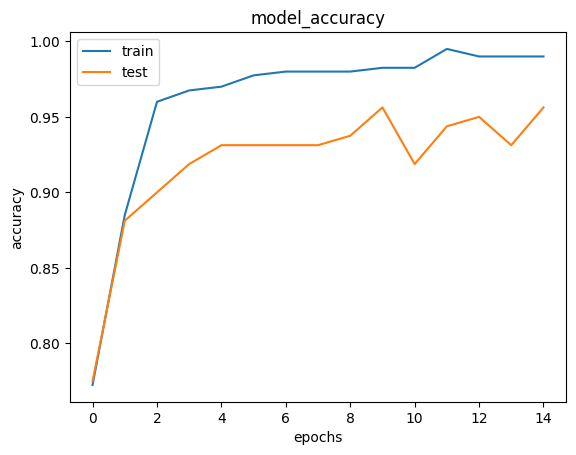

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

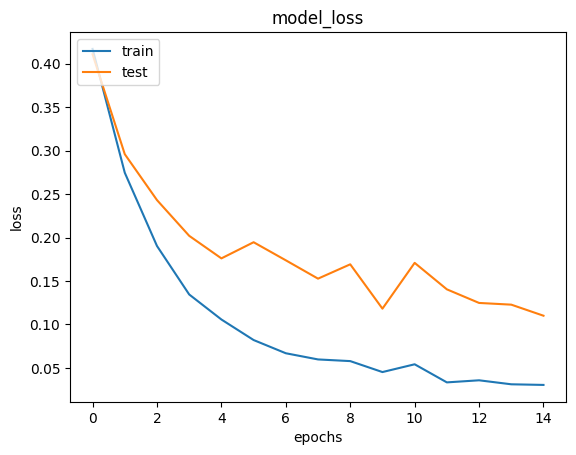

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [15]:
class_dictionary = {}
class_dictionary[0]  = 'no_car'
class_dictionary[1]  = 'car'

In [16]:
class_dictionary

{0: 'no_car', 1: 'car'}

In [17]:
import cv2
import numpy as np

def make_prediction(image):
    image = cv2.imread(image)
    image = cv2.resize(image, (48, 48))
    img = image/255
#     (1, 48, 48, 3) -> 4D Tensor
    img = np.expand_dims(img, axis = 0)

    class_predicted = model_final.predict(img)
    intId = np.argmax(class_predicted[0])
    label = class_dictionary[intId]
    return label

In [20]:
make_prediction("/content/drive/MyDrive/train_data/test/occupied/spot138.jpg")

1/1 [==============================] - 0s 18ms/step


'car'

In [25]:
 make_prediction("/content/drive/MyDrive/train_data/test/empty/spot167.jpg")

1/1 [==============================] - 0s 18ms/step


'no_car'

In [26]:
model_final.save("model_final.h5")